In [ ]:
#!pip install torch==2.1.0 transformers==4.35.0 accelerate bitsandbytes

In [2]:
import torch
import requests
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration

In [3]:
save_path = './blip2/'

In [8]:
processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b", cache_dir=save_path)
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", load_in_8bit=True, device_map="auto", cache_dir=save_path)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [30]:
img_url = 'https://img.freepik.com/free-photo/pizza-pizza-filled-with-tomatoes-salami-olives_140725-1200.jpg?w=1480&t=st=1699218108~exp=1699218708~hmac=b6326f806210184b551c230e626a38d5a66518709c557f65e99a0296dfad7a45' 
# img_url = 'https://www.science.org/do/10.1126/science.abi5787/full/main_puppies_1280p-1670855432630.jpg'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

#question = "What are steps to cook the dish in the image?"
question = "what do you see in this image?"

qtext = f"Question: {question} Answer:"
inputs = processor(raw_image, qtext, return_tensors="pt").to("cuda", torch.float16)

decoding_method = "Nucleus sampling"

generated_ids = model.generate(
    **inputs,
    do_sample=decoding_method == "Nucleus sampling",
    temperature=2.0,
    length_penalty=1.0,
    repetition_penalty=1.5,
    max_length=500,
    min_length=1,
    num_beams=5,
    top_p=0.9,
)
result = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()

In [31]:
generated_ids

tensor([[    2,  9366,    19, 18553,     6, 22796,  3699,     6, 28314,     8,
          7134, 50118]], device='cuda:0')

In [32]:
result

'pizza with tomatoes, olives, peppers and cheese'

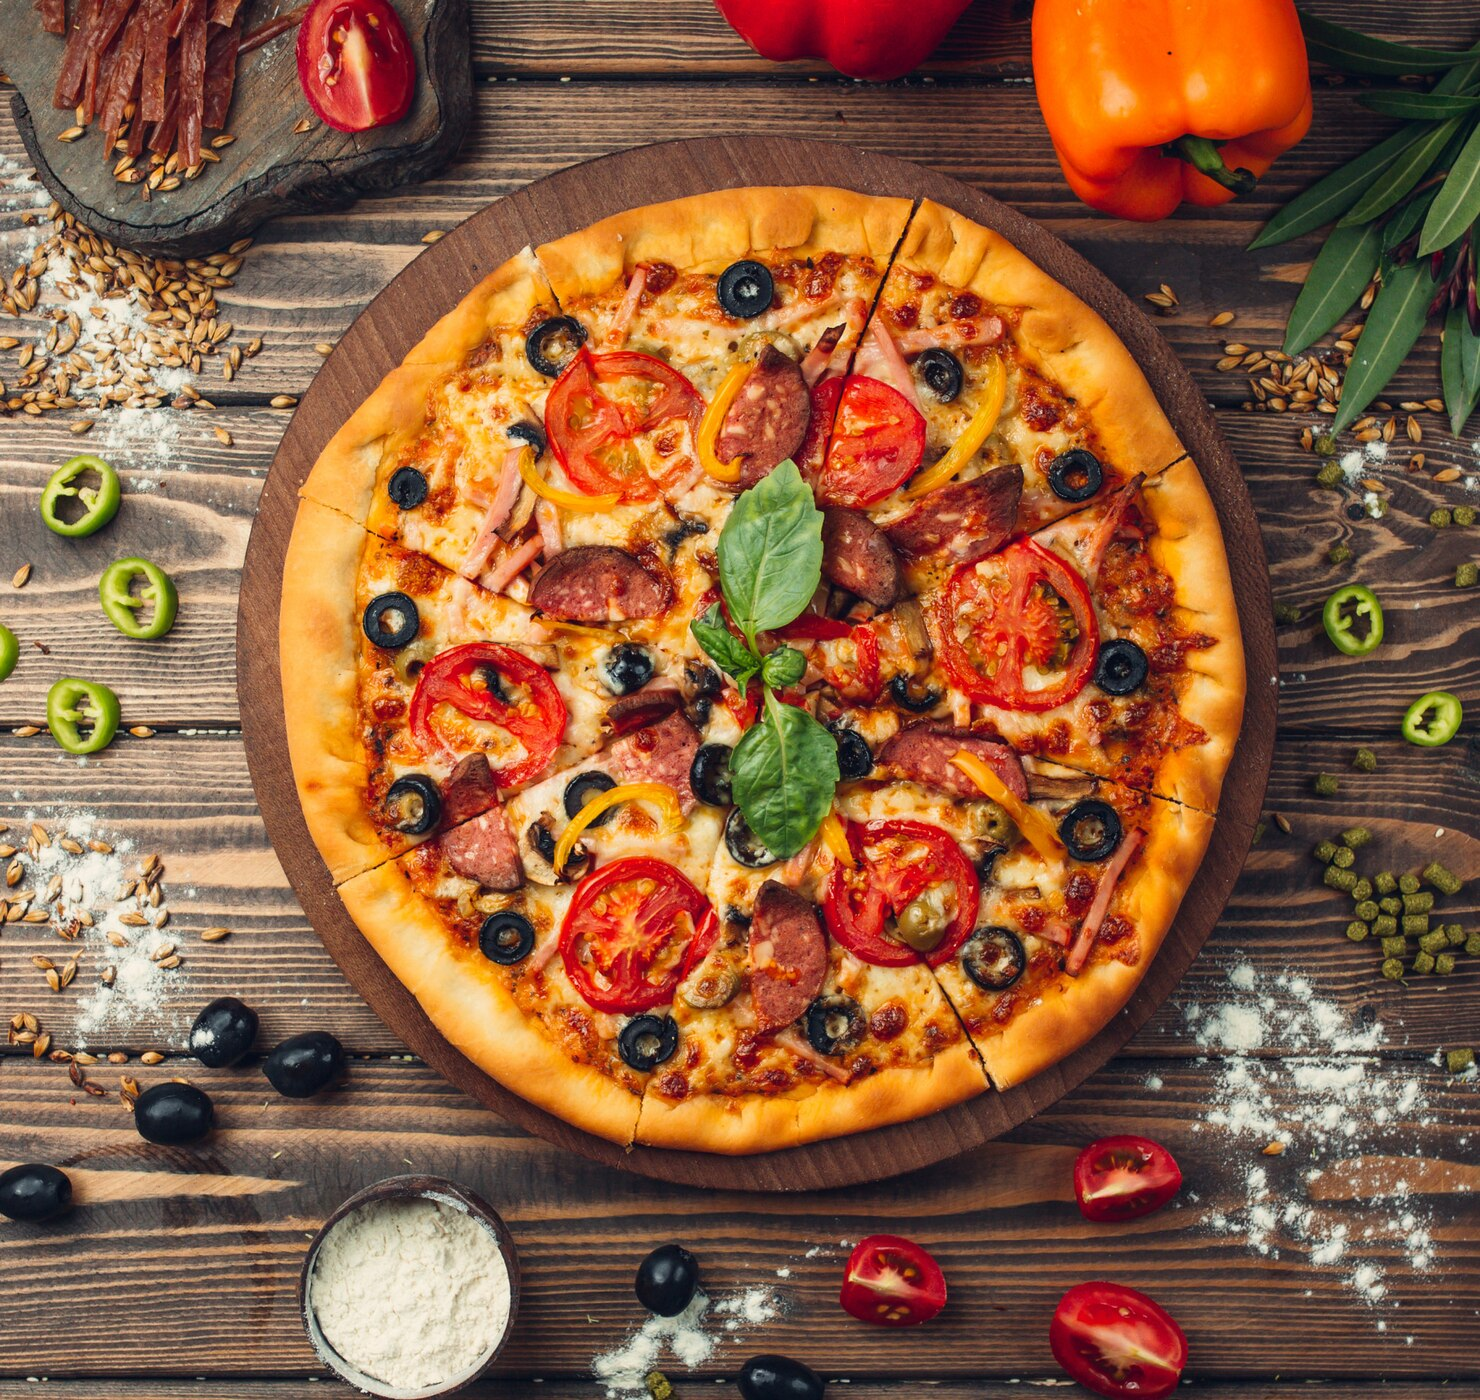

In [31]:
raw_image